In [12]:
import Utils
import uproot
import numpy as np
import awkward as ak

import matplotlib.pyplot as plt
import scienceplots
import os

os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

plt.style.use('science')

%matplotlib inline

# Load data
fKalman = uproot.open('data/KalmanZYSorted.root')
fSliding = uproot.open('data/Sliding.root')

# Tracks with high number of points
nSPThreshold = 90

nSPMask_Kalman = ak.num(Utils.GetTPs(fKalman)[0]) > nSPThreshold
nSPMask_Sliding = ak.num(Utils.GetTPs(fSliding)[0]) > nSPThreshold

if ak.sum(nSPMask_Sliding) != ak.sum(nSPMask_Sliding):
    print("[ATTN] Number of tracks are not the same")

## Track Length

Track indices with dl > 4: [ 25  39  54  67  69  72 115 119 123 141 143 152 155 177 179]


[]

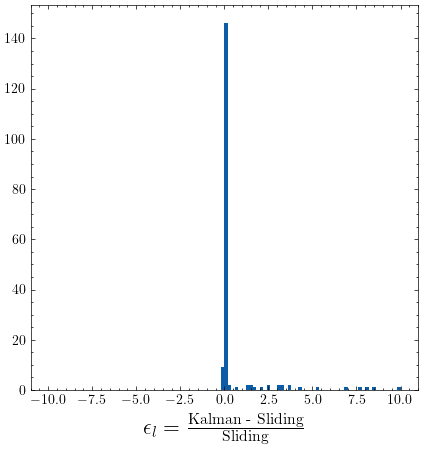

In [13]:
trackLength_Pandora = Utils.ReadBranch(fSliding, 'trackLength')[nSPMask_Sliding].to_numpy()
trackLength_Kalman  = Utils.ReadBranch(fKalman, 'trackLength')[nSPMask_Kalman].to_numpy()

dl = np.divide(trackLength_Kalman - trackLength_Pandora, trackLength_Pandora)

print("Track indices with dl > 4: {0}".format(np.where(dl > 4)[0]))

fig_dl, ax_dl = plt.subplots(figsize=(5,5))

ax_dl.hist(dl, range=[-10, 10],bins=100)
ax_dl.set_xlabel(r'$\epsilon_l = \frac{\text{Kalman - Sliding}}{\text{Sliding}}$', fontsize=16)
plt.savefig('dl.png')
plt.plot()

## Start and End Points

### Start point

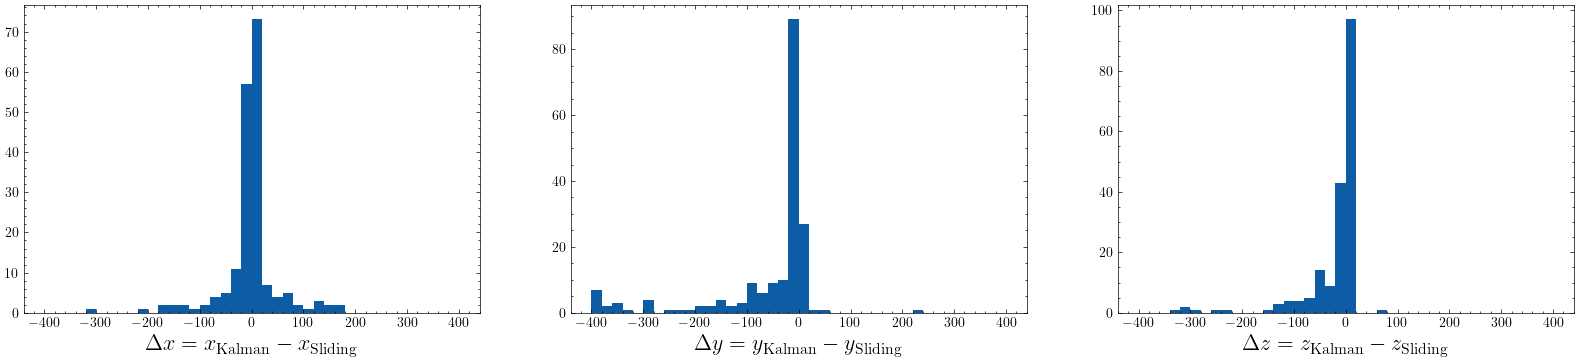

In [9]:
x_Kalman, y_Kalman, z_Kalman = Utils.ReadBranch(fKalman, 'trackStart/fCoordinates/')
x_Kalman = x_Kalman[nSPMask_Kalman].to_numpy()
y_Kalman = y_Kalman[nSPMask_Kalman].to_numpy()
z_Kalman = z_Kalman[nSPMask_Kalman].to_numpy()

x_Sliding, y_Sliding, z_Sliding = Utils.ReadBranch(fSliding, 'trackStart/fCoordinates/')
x_Sliding = x_Sliding[nSPMask_Sliding].to_numpy()
y_Sliding = y_Sliding[nSPMask_Sliding].to_numpy()
z_Sliding = z_Sliding[nSPMask_Sliding].to_numpy()

ds_x = x_Kalman - x_Sliding
ds_y = y_Kalman - y_Sliding
ds_z = z_Kalman - z_Sliding

fig_ds, ax_ds = plt.subplots(1, 3, figsize=(20, 4))
ax_ds[0].hist(ds_x, range=[-400,400], bins=40)
ax_ds[1].hist(ds_y, range=[-400,400], bins=40)
ax_ds[2].hist(ds_z, range=[-400,400], bins=40)

ax_ds[0].set_xlabel(r'$\Delta x = x_{\text{Kalman}} - x_{\text{Sliding}}$', fontsize=16)
ax_ds[1].set_xlabel(r'$\Delta y = y_{\text{Kalman}} - y_{\text{Sliding}}$', fontsize=16)
ax_ds[2].set_xlabel(r'$\Delta z = z_{\text{Kalman}} - z_{\text{Sliding}}$', fontsize=16)

plt.savefig('dstart.png')
plt.show()

### End point

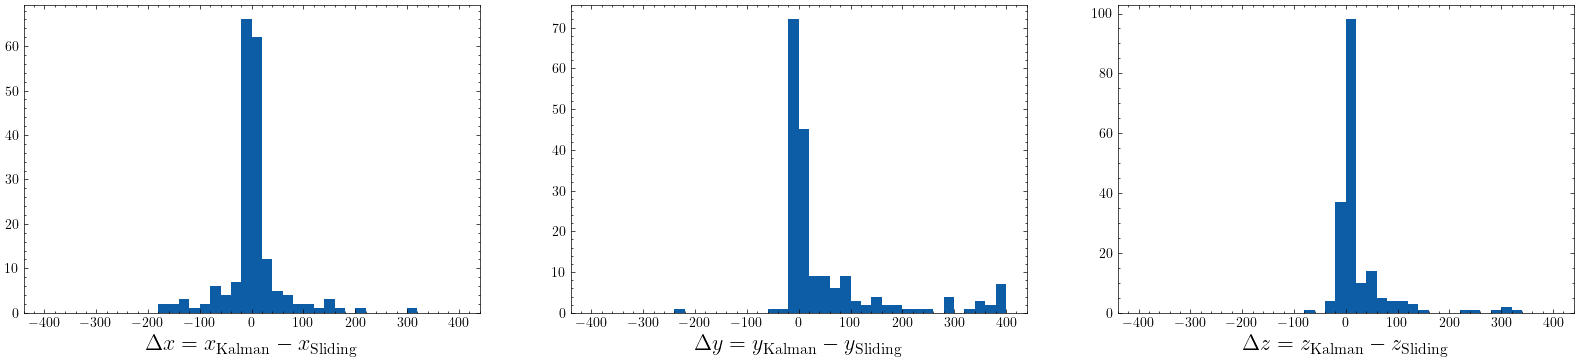

In [10]:
x_Kalman, y_Kalman, z_Kalman = Utils.ReadBranch(fKalman, 'trackEnd/fCoordinates/')
x_Kalman = x_Kalman[nSPMask_Kalman].to_numpy()
y_Kalman = y_Kalman[nSPMask_Kalman].to_numpy()
z_Kalman = z_Kalman[nSPMask_Kalman].to_numpy()

x_Sliding, y_Sliding, z_Sliding = Utils.ReadBranch(fSliding, 'trackEnd/fCoordinates/')
x_Sliding = x_Sliding[nSPMask_Sliding].to_numpy()
y_Sliding = y_Sliding[nSPMask_Sliding].to_numpy()
z_Sliding = z_Sliding[nSPMask_Sliding].to_numpy()

ds_x = x_Kalman - x_Sliding
ds_y = y_Kalman - y_Sliding
ds_z = z_Kalman - z_Sliding

fig_ds, ax_ds = plt.subplots(1, 3, figsize=(20, 4))
ax_ds[0].hist(ds_x, range=[-400,400], bins=40)
ax_ds[1].hist(ds_y, range=[-400,400], bins=40)
ax_ds[2].hist(ds_z, range=[-400,400], bins=40)

ax_ds[0].set_xlabel(r'$\Delta x = x_{\text{Kalman}} - x_{\text{Sliding}}$', fontsize=16)
ax_ds[1].set_xlabel(r'$\Delta y = y_{\text{Kalman}} - y_{\text{Sliding}}$', fontsize=16)
ax_ds[2].set_xlabel(r'$\Delta z = z_{\text{Kalman}} - z_{\text{Sliding}}$', fontsize=16)

plt.savefig('dend.png')
plt.show()

## Opening angle

[]

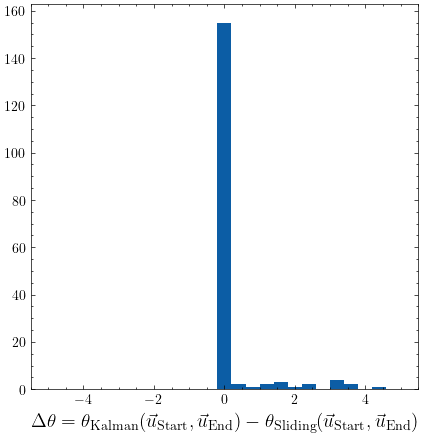

In [11]:
xS_Kalman, yS_Kalman, zS_Kalman = Utils.GetDir(fKalman, 'startDir')
xS_Kalman = xS_Kalman[nSPMask_Kalman].to_numpy()
yS_Kalman = yS_Kalman[nSPMask_Kalman].to_numpy()
zS_Kalman = zS_Kalman[nSPMask_Kalman].to_numpy()

xS_Sliding, yS_Sliding, zS_Sliding = Utils.GetDir(fSliding, 'startDir')
xS_Sliding = xS_Sliding[nSPMask_Sliding].to_numpy()
yS_Sliding = yS_Sliding[nSPMask_Sliding].to_numpy()
zS_Sliding = zS_Sliding[nSPMask_Sliding].to_numpy()


xE_Kalman, yE_Kalman, zE_Kalman = Utils.GetDir(fKalman, 'endDir')
xE_Kalman = xE_Kalman[nSPMask_Kalman].to_numpy()
yE_Kalman = yE_Kalman[nSPMask_Kalman].to_numpy()
zE_Kalman = zE_Kalman[nSPMask_Kalman].to_numpy()

xE_Sliding, yE_Sliding, zE_Sliding = Utils.GetDir(fSliding, 'endDir')
xE_Sliding = xE_Sliding[nSPMask_Sliding].to_numpy()
yE_Sliding = yE_Sliding[nSPMask_Sliding].to_numpy()
zE_Sliding = zE_Sliding[nSPMask_Sliding].to_numpy()

# Norms
normS_Kalman  = np.sqrt(xS_Kalman**2 + yS_Kalman**2 + zS_Kalman**2)
normE_Kalman  = np.sqrt(xE_Kalman**2 + yE_Kalman**2 + zE_Kalman**2)
normS_Sliding = np.sqrt(xS_Sliding**2 + yS_Sliding**2 + zS_Sliding**2)
normE_Sliding = np.sqrt(xE_Sliding**2 + yE_Sliding**2 + zE_Sliding**2)

# Opening angle
cos_Kalman = np.divide(
    xS_Kalman*xE_Kalman + yS_Kalman*yE_Kalman + zS_Kalman*zS_Kalman, 
    normS_Kalman * normE_Kalman
)
cos_Sliding = np.divide(
    xS_Sliding*xE_Sliding + yS_Sliding*yE_Sliding + zS_Sliding*zS_Sliding,
    normS_Sliding * normE_Sliding
)

cos_Kalman = np.clip(cos_Kalman, -1, 1)
cos_Sliding = np.clip(cos_Sliding, -1, 1)

theta_Kalman = np.arccos(cos_Kalman)
theta_Sliding = np.arccos(cos_Sliding)

dtheta = theta_Kalman - theta_Sliding

fig_theta, ax_theta = plt.subplots(figsize=(5,5))

ax_theta.hist(dl, range=[-5, 5], bins=25)
ax_theta.set_xlabel(r'$\Delta\theta = \theta_{\text{Kalman}}(\vec{u}_{\text{Start}}, \vec{u}_\text{End}) - \theta_{\text{Sliding}}(\vec{u}_{\text{Start}}, \vec{u}_\text{End})$', fontsize=14)
plt.savefig('dtheta.png')
plt.plot()